In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.metrics import roc_curve

In [2]:
train_label_obj = np.load(f"train_labels.npy",allow_pickle=True).item()
test_label_obj = np.load(f"labels.npy",allow_pickle=True).item()
train_scores = np.load("train_scores.npy",allow_pickle=True).item()
test_scores = np.load("test_scores.npy",allow_pickle=True).item()
col_obj = torch.load("column.pkl")
test_obj = np.load("test_brand1.npy",allow_pickle=True).item()
train_obj = np.load("train_brand1_dict.npy",allow_pickle=True).item()

In [3]:
train_data = torch.load("train_rec_data.pt",map_location="cpu",weights_only=False) # rec data
test_data = torch.load("test_rec_data.pt",map_location="cpu",weights_only=False) # rec data

In [4]:
def convert_to_np(all_rec_obj):
    modified_dict = {}
    for k,v in all_rec_obj.items():
        v = np.asarray(v)
        modified_dict[k] = v
    return modified_dict


In [24]:
all_obj = {}
train_obj.update(test_obj)
all_obj.update(train_obj)
all_score = {}
train_scores.update(test_scores)
all_score.update(train_scores)
all_score = convert_to_np(all_score)

all_label = {}
train_label_obj.update(test_label_obj)
all_label.update(train_label_obj)

Total_FN_car = [171,184,105,21,196,119]

# reconstruction data
all_rec_obj = {}
train_data.update(test_data)
all_rec_obj.update(train_data)
all_rec_obj = convert_to_np(all_rec_obj)

normal_score = {}
abnormal_score = {}
for k,v in all_label.items():
    if v==0 :
        s = np.asarray(all_score[k]).reshape(-1)
        score = np.sort(s)[-3:].mean()
        normal_score[k] = float(score)
    elif v==1:
        s = np.asarray(all_score[k]).reshape(-1)
        score = np.sort(s)[-3:].mean()
        abnormal_score[k] = float(score)

sorted_normal_score = sorted(normal_score.items(),key=lambda x:x[1],reverse=True)
sorted_abnormal_score = sorted(abnormal_score.items(),key=lambda x:x[1],reverse=True)
print(sorted_normal_score)
print(sorted_abnormal_score)

print("")
FN_car = sorted_abnormal_score[-6:]
FN_car.sort(key=lambda x:x[1],reverse=False)
print(FN_car)
TP_car = sorted_abnormal_score[:6]
print(TP_car)
normal_hierror_car = sorted_normal_score[:6]
print(normal_hierror_car)
normal_lowerror_car = sorted_normal_score[-6:]
normal_lowerror_car.sort(key=lambda x:x[1],reverse=False)
print(normal_lowerror_car)


[(138, 0.022628915185729664), (35, 0.014172223707040152), (83, 0.009821094882984957), (131, 0.007274729044487079), (14, 0.006621041800826788), (44, 0.006312412675470114), (67, 0.005847706459462643), (128, 0.005609900690615177), (127, 0.005432768724858761), (17, 0.005424637037018935), (179, 0.0049604276816050214), (160, 0.004538929866005977), (144, 0.004085995877782504), (82, 0.004040288894126813), (141, 0.00311361369676888), (53, 0.003086476121097803), (112, 0.0030130104472239814), (113, 0.0027832058258354664), (195, 0.0027284535268942514), (30, 0.002726549282670021), (85, 0.0027180414957304797), (80, 0.00269052394044896), (165, 0.0026780602832635245), (145, 0.0026771551153312125), (52, 0.0026487472156683602), (132, 0.0026426882638285556), (64, 0.002533446221301953), (151, 0.0025146916353454194), (19, 0.0024977034578720727), (104, 0.0024881525120387473), (147, 0.0024608244032909474), (31, 0.0024577181320637465), (72, 0.0024558646449198327), (176, 0.0024524287631114325), (32, 0.00244985

In [39]:
#Change selection number for checking other cars
selection_number = 2
number_of_data = 1
fn_cid = FN_car[selection_number][0]
tp_cid = TP_car[selection_number][0]
normal_hi_cid = normal_hierror_car[selection_number][0]
normal_lo_cid = normal_lowerror_car[selection_number][0]

print(f"FN car id = {fn_cid}")
print(f"TP car id = {tp_cid}")
print(f"Normal high error car id = {normal_hi_cid}")
print(f"Normal low error car id = {normal_lo_cid}")

FN car id = 105
TP car id = 190
Normal high error car id = 83
Normal low error car id = 13


In [40]:

fn_top_idx = np.argsort(all_score[fn_cid])[-number_of_data:]
print(fn_top_idx)
for i in range(number_of_data):
    print(f"{fn_top_idx[-i-1]} : {all_score[fn_cid][fn_top_idx[-i-1]]}")
tp_top_idx = np.argsort(all_score[tp_cid])[-number_of_data:]
print(tp_top_idx)
for i in range(number_of_data):
    print(f"{tp_top_idx[-i-1]} : {all_score[tp_cid][tp_top_idx[-i-1]]}")
# normal car도 함께 플롯할 예정

norm_top_idx = np.argsort(all_score[normal_hi_cid])[-number_of_data:]
print(norm_top_idx)
for i in range(number_of_data):
    print(f"{norm_top_idx[-i-1]} : {all_score[normal_hi_cid][norm_top_idx[-i-1]]}")

norm_low_idx = np.argsort(all_score[normal_lo_cid])[-number_of_data:]
print(norm_low_idx)
for i in range(number_of_data):
    print(f"{norm_low_idx[-i-1]} : {all_score[normal_lo_cid][norm_low_idx[-i-1]]}")

[32]
32 : 0.0016294445376843214
[483]
483 : 0.015007970854640007
[1024]
1024 : 0.0104370741173625
[3]
3 : 0.0010941491927951574


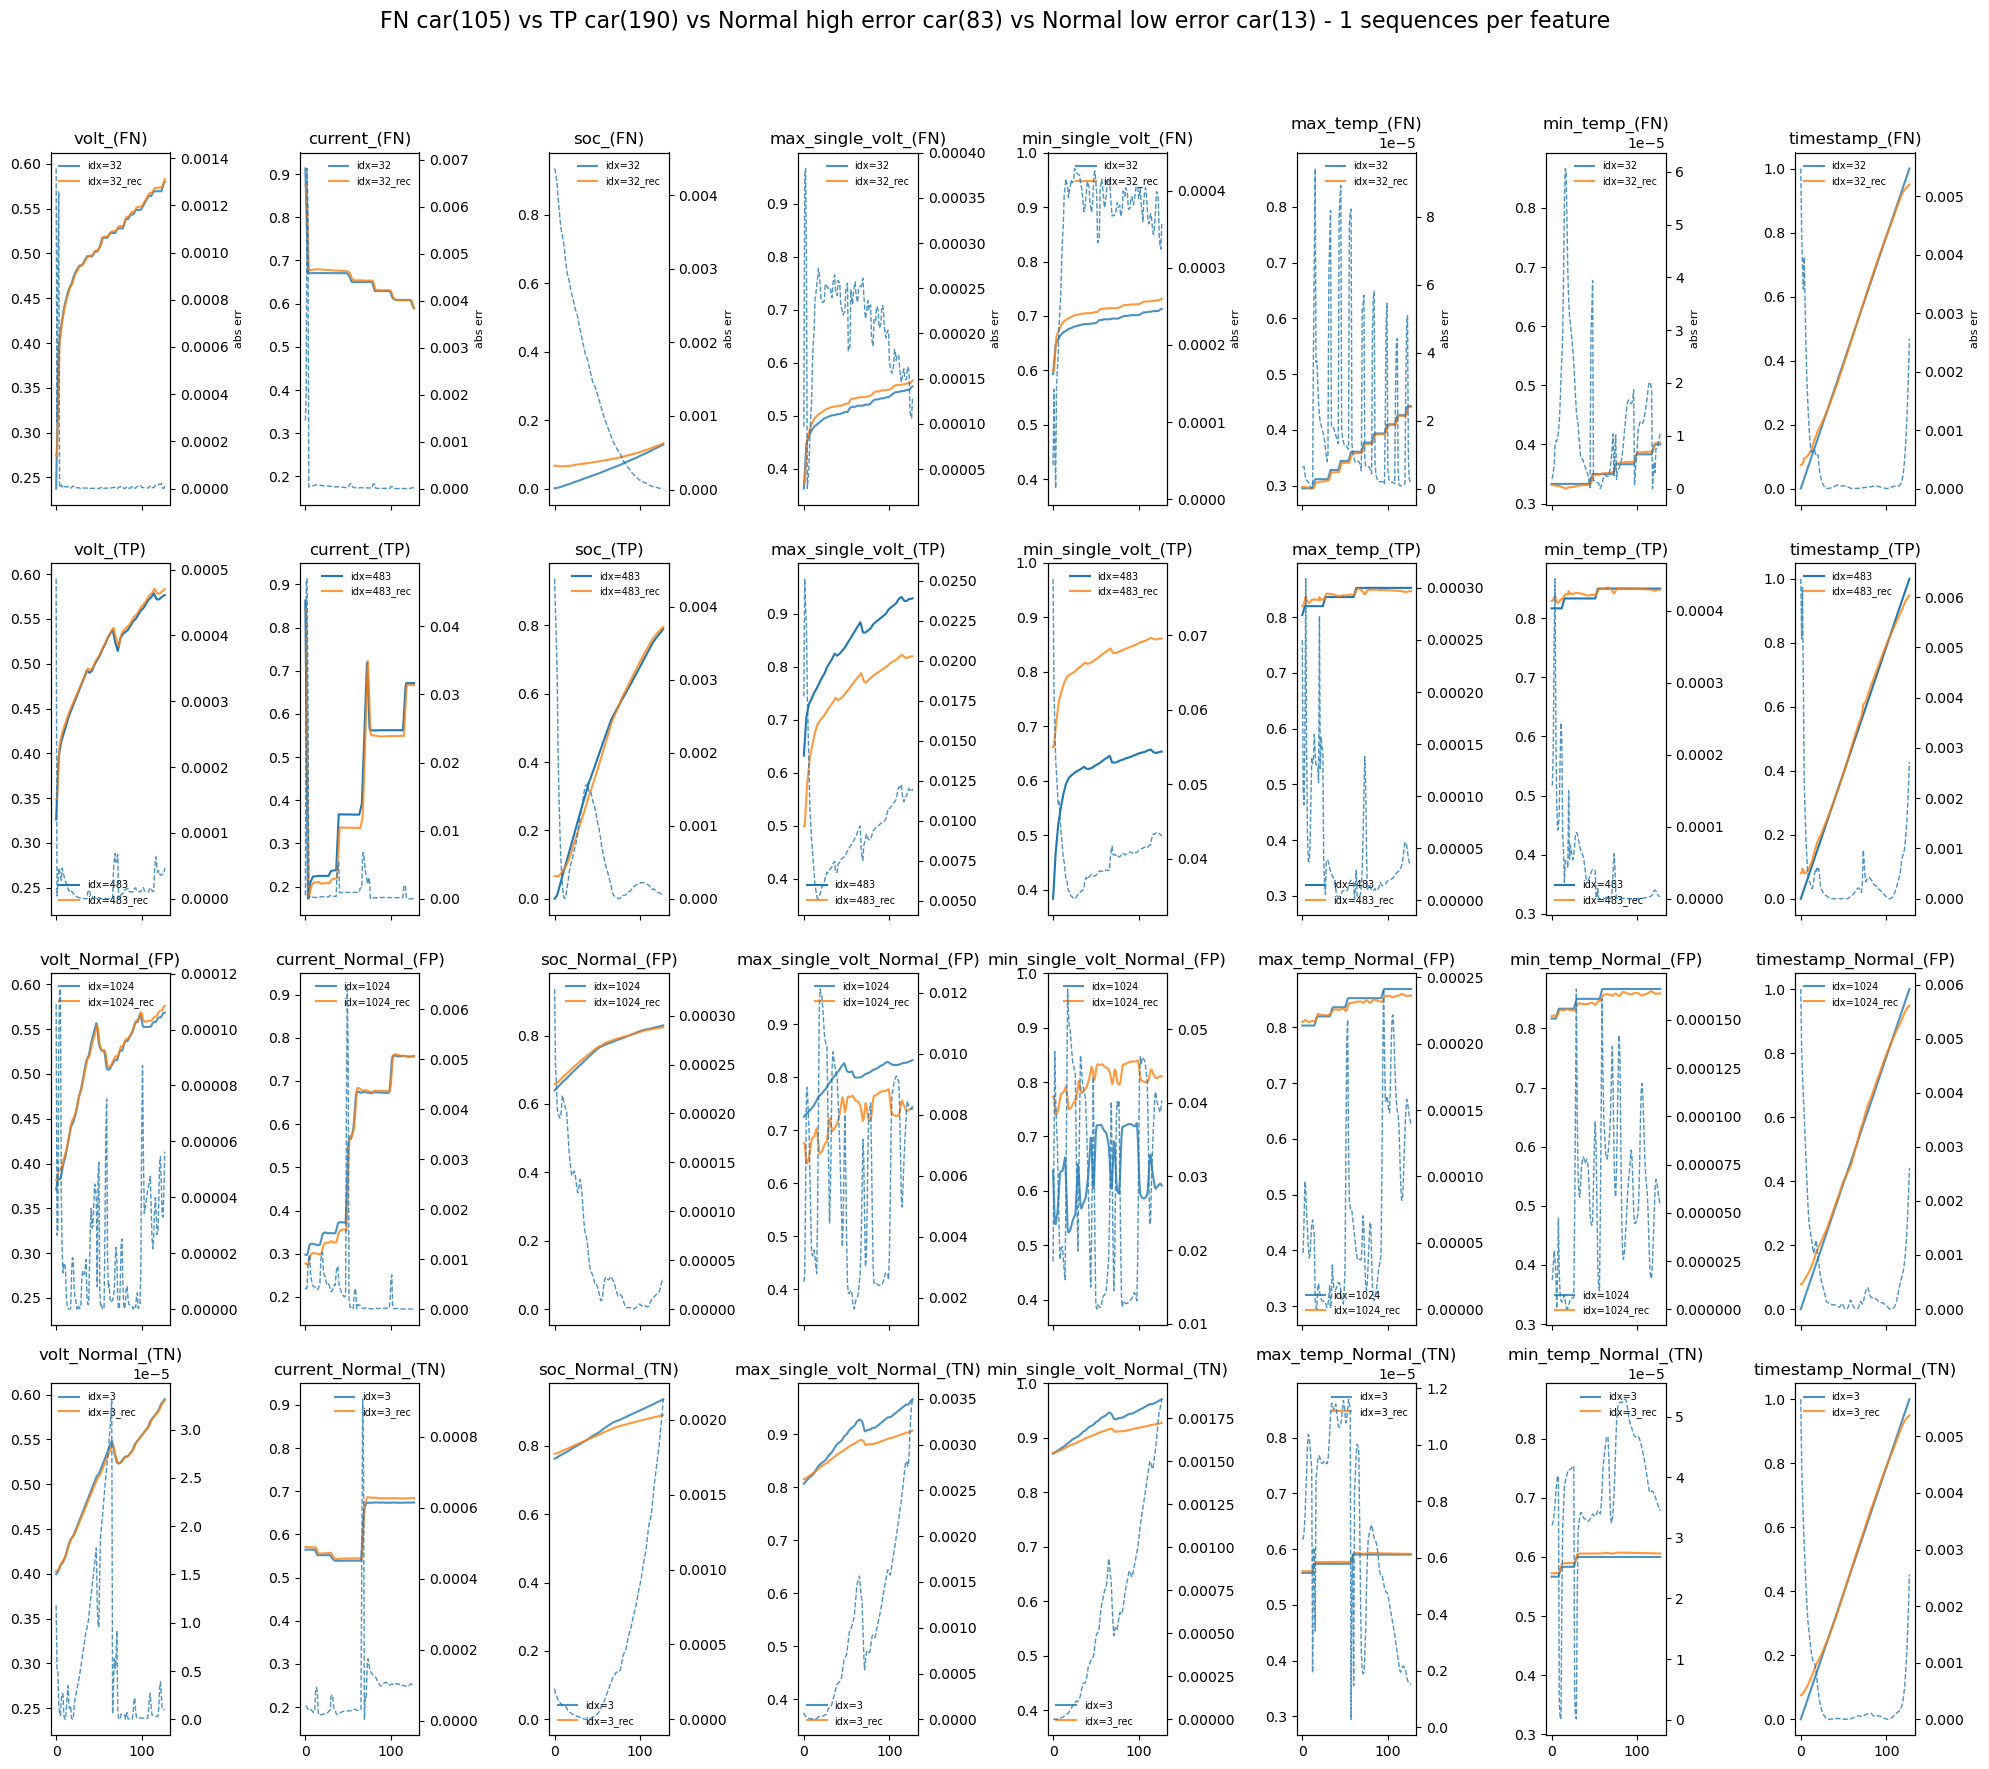

In [41]:
col = len(col_obj)
fig,axes = plt.subplots(
    nrows=4,
    ncols=col,
    figsize = (20,18),
    sharex=True,
    sharey='col'
)
fig.suptitle(f"FN car({fn_cid}) vs TP car({tp_cid}) vs Normal high error car({normal_hi_cid}) vs Normal low error car({normal_lo_cid}) - {number_of_data} sequences per feature", fontsize=16)
for i in range(col):
    ax_err_fn = axes[0,i].twinx()
    ax_err_tp = axes[1,i].twinx()
    ax_err_fp = axes[2,i].twinx()
    ax_err_tn = axes[3,i].twinx()
    ax_err_fn.set_ylabel("abs err", fontsize=8)
    for n in fn_top_idx:
        l1loss = np.abs(all_rec_obj[fn_cid][n,:,i] - all_obj[fn_cid][n,:,i])

        axes[0,i].plot(all_obj[fn_cid][n,:,i],label=f"idx={n}",alpha=0.8)
        axes[0,i].plot(all_rec_obj[fn_cid][n,:,i],label=f"idx={n}_rec",alpha=0.8)
        # ax_err_fn.plot(l1loss, label=f"idx={n}_abs",linestyle="--",alpha=0.8,linewidth=1.0)
        ax_err_fn.plot(np.pow(l1loss,2), label=f"idx={n}_abs",linestyle="--",alpha=0.8,linewidth=1.0)
        axes[0,i].set_title(f"{col_obj[i]}_(FN)")
        axes[0, i].legend(fontsize=7, frameon=False) 
    for n in tp_top_idx:
        l1loss = np.abs(all_rec_obj[tp_cid][n,:,i] - all_obj[tp_cid][n,:,i])

        axes[1,i].plot(all_obj[tp_cid][n,:,i],label=f"idx={n}")
        axes[1,i].plot(all_rec_obj[tp_cid][n,:,i],label=f"idx={n}_rec",alpha=0.8)
        # ax_err_tp.plot(l1loss, label=f"idx={n}_abs",linestyle="--",alpha=0.8,linewidth=1.0)
        ax_err_tp.plot(np.pow(l1loss,2), label=f"idx={n}_abs",linestyle="--",alpha=0.8,linewidth=1.0)

        axes[1,i].set_title(f"{col_obj[i]}_(TP)")
        axes[1, i].legend(fontsize=7, frameon=False)
    for n in norm_top_idx:
        l1loss = np.abs(all_rec_obj[normal_hi_cid][n,:,i] - all_obj[normal_hi_cid][n,:,i])

        axes[2,i].plot(all_obj[normal_hi_cid][n,:,i],label=f"idx={n}",alpha=0.8)
        axes[2,i].plot(all_rec_obj[normal_hi_cid][n,:,i],label=f"idx={n}_rec",alpha=0.8)
        # ax_err_fp.plot(l1loss, label=f"idx={n}_abs",linestyle="--",alpha=0.8,linewidth=1.0)
        ax_err_fp.plot(np.pow(l1loss,2), label=f"idx={n}_abs",linestyle="--",alpha=0.8,linewidth=1.0)

        axes[2,i].set_title(f"{col_obj[i]}_Normal_(FP)")
        axes[2,i].legend(fontsize=7, frameon=False) 
    for n in norm_low_idx:
        l1loss = np.abs(all_rec_obj[normal_lo_cid][n,:,i] - all_obj[normal_lo_cid][n,:,i])

        axes[3,i].plot(all_obj[normal_lo_cid][n,:,i],label=f"idx={n}",alpha=0.8)
        axes[3,i].plot(all_rec_obj[normal_lo_cid][n,:,i],label=f"idx={n}_rec",alpha=0.8)
        # ax_err_tn.plot(l1loss, label=f"idx={n}_abs",linestyle="--",alpha=0.8,linewidth=1.0)
        ax_err_tn.plot(np.pow(l1loss,2), label=f"idx={n}_abs",linestyle="--",alpha=0.8,linewidth=1.0)
        axes[3,i].set_title(f"{col_obj[i]}_Normal_(TN)")
        axes[3,i].legend(fontsize=7, frameon=False)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # suptitle 공간 확보
plt.show()